<a href="https://colab.research.google.com/github/OmarFarukNoman/Into-to-Machine-Learning/blob/main/Homework-2/Problem_3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


For Standardization with Regularization (11 features)
Learning Rate: 0.01
Regularization Parameter (λ): 1.5
Final Training Loss (with reg): 518409595659.13
Final Validation Loss: 814440474879.87
Theta values: [4690108.49966251  461386.68512225   74721.94841389  465320.62100382
  447351.51812326  175305.48142178  129440.6990697   137258.37554112
  197108.80482189  392857.25346632  282929.35454746  311147.90196386]

Parameters (with regularization):
Theta_0: 4690108.50
area (theta_1): 461386.69
bedrooms (theta_2): 74721.95
bathrooms (theta_3): 465320.62
stories (theta_4): 447351.52
mainroad (theta_5): 175305.48
guestroom (theta_6): 129440.70
basement (theta_7): 137258.38
hotwaterheating (theta_8): 197108.80
airconditioning (theta_9): 392857.25
parking (theta_10): 282929.35
prefarea (theta_11): 311147.90

For Normalization with Regularization (11 features)
Learning Rate: 0.01
Regularization Parameter (λ): 1.5
Final Training Loss (with reg): 649297747134.64
Final Validation Loss: 10577548

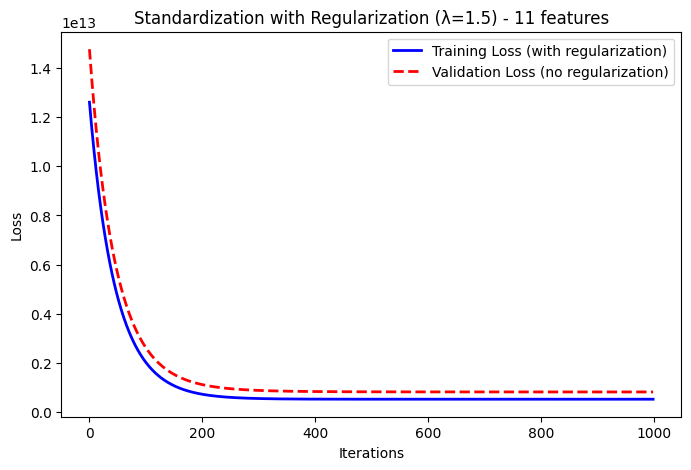

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# For HW2, we're using housing dataset as per instruction.
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv"
h_data = pd.read_csv(url)

# I've defined i/p and o/p for this problem
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
           'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

X_in = h_data[features].copy()
y_out = h_data['price'].values.reshape(-1, 1) #It converts the output as a 1D array with m=5 rows

# There are some categorical values. I've converted to numerical
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in categorical_cols:
    X_in[col] = X_in[col].map({'yes': 1, 'no': 0})

X_in = X_in.values

# I've splitted the dataset into traning (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_in, y_out, test_size=0.2, random_state=80)

# I've used standardization and normalization
def standardize_features(X_train, X_val):
    X_mean = X_train.mean(axis=0)
    X_std = X_train.std(axis=0)
    X_std[X_std == 0] = 1  # Avoid division by zero
    X_train_std = (X_train - X_mean) / X_std
    X_val_std = (X_val - X_mean) / X_std
    return X_train_std, X_val_std

def normalize_features(X_train, X_val):
    X_min = X_train.min(axis=0)
    X_max = X_train.max(axis=0)
    X_train_norm = (X_train - X_min) / (X_max - X_min)
    X_val_norm = (X_val - X_min) / (X_max - X_min)
    return X_train_norm, X_val_norm

X_train_std, X_val_std = standardize_features(X_train, X_val)
X_train_norm, X_val_norm = normalize_features(X_train, X_val)

# Gradient descent
def gradient_descent_regularized(X_in, y_out, X_val, y_val, learning_rate, max_iterations, lambda_reg):
    m, n = X_in.shape
    X_b = np.c_[np.ones((m, 1)), X_in]

    m_val = X_val.shape[0]
    X_val_b = np.c_[np.ones((m_val, 1)), X_val]

    theta = np.zeros((n + 1, 1))
    train_losses = []
    val_losses = []

    for iteration in range(max_iterations):

        predictions = X_b @ theta
        gradients = (1/m) * X_b.T @ (predictions - y_out)

        # I've added regularization
        gradients[1:] = gradients[1:] + (lambda_reg/m) * theta[1:]

        # Update parameters
        theta -= learning_rate * gradients

        # Training loss with regularization
        mse_loss = (1/(2*m)) * np.sum((predictions - y_out)**2)
        reg_loss = (lambda_reg/(2*m)) * np.sum(theta[1:]**2)
        train_loss = mse_loss + reg_loss

        # Validation loss with no regularization
        val_predictions = X_val_b @ theta
        val_loss = (1/(2*m_val)) * np.sum((val_predictions - y_val)**2)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return theta, train_losses, val_losses

learning_rate = 0.01
max_iterations = 1000
lambda_reg = 1.5  # Regularization parameter

# Standardization and regularization
theta_std_reg, train_losses_std_reg, val_losses_std_reg = gradient_descent_regularized(
    X_train_std, y_train, X_val_std, y_val, learning_rate, max_iterations, lambda_reg
)

# Normalization and regularization
theta_norm_reg, train_losses_norm_reg, val_losses_norm_reg = gradient_descent_regularized(
    X_train_norm, y_train, X_val_norm, y_val, learning_rate, max_iterations, lambda_reg
)

# Standardization with regularization
plt.figure(figsize=(8, 5))
plt.plot(train_losses_std_reg, label='Training Loss (with regularization)', linewidth=2, color='blue')
plt.plot(val_losses_std_reg, label='Validation Loss (no regularization)', linewidth=2, linestyle='--', color='red')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title(f'Standardization with Regularization (λ={lambda_reg}) - 11 features')
plt.legend()

# Standardization with regularization
print("\nFor Standardization with Regularization (11 features)")
print(f"Learning Rate: {learning_rate}")
print(f"Regularization Parameter (λ): {lambda_reg}")
print(f"Final Training Loss (with reg): {train_losses_std_reg[-1]:.2f}")
print(f"Final Validation Loss: {val_losses_std_reg[-1]:.2f}")
print(f"Theta values: {theta_std_reg.flatten()}")

# Parameters with feature names for Standardization
print("\nParameters (with regularization):")
print(f"Theta_0: {theta_std_reg[0][0]:.2f}")
for i, feature in enumerate(features):
    print(f"{feature} (theta_{i+1}): {theta_std_reg[i+1][0]:.2f}")

# Normalization with regularization
print("\nFor Normalization with Regularization (11 features)")
print(f"Learning Rate: {learning_rate}")
print(f"Regularization Parameter (λ): {lambda_reg}")
print(f"Final Training Loss (with reg): {train_losses_norm_reg[-1]:.2f}")
print(f"Final Validation Loss: {val_losses_norm_reg[-1]:.2f}")
print(f"Theta values: {theta_norm_reg.flatten()}")

# Parameters with feature names for Normalization
print("\nParameters (with regularization):")
print(f"Theta_0: {theta_norm_reg[0][0]:.2f}")
for i, feature in enumerate(features):
    print(f"{feature} (theta_{i+1}): {theta_norm_reg[i+1][0]:.2f}")
